<a href="https://colab.research.google.com/github/michellechen202212/udacity-datascience/blob/main/blog_post.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Data Science Blog Post
The notebook follows the CRISP-DM framework


## Business Understanding:

During this project, you will write a blog post that answers the following question from your chosen data set.

Questions:

**1.** What are the most important features of the data set, what do they mean, and how do they drive the predicted outcome?

**2.** What unusual, or creative, insights are you able to gather from the data set?
How accurate is the model that you have trained to predict the data in the data set?

**3.** What will happen in a creative, predictive, scenario using the model that you have trained?

**4.** The purpose of the project is to show that you understand the information presented to you and can explain it in a clear way to an audience.


# Data Understanding:
The dataset features are clearly described, including HBA_NSA, WBA_NSA, and others, along with their significance.

In [1]:
import pandas as pd

# Load the dataset to explore its contents
file_path = 'sample_data/bfs_us_apps_weekly_nsa.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        986 non-null    int64  
 1   Week        986 non-null    int64  
 2   BA_NSA      986 non-null    int64  
 3   HBA_NSA     986 non-null    int64  
 4   WBA_NSA     986 non-null    int64  
 5   CBA_NSA     986 non-null    int64  
 6   YY_BA_NSA   932 non-null    float64
 7   YY_HBA_NSA  932 non-null    float64
 8   YY_WBA_NSA  932 non-null    float64
 9   YY_CBA_NSA  932 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 77.2 KB


,Year,Week,BA_NSA,HBA_NSA,WBA_NSA,CBA_NSA,YY_BA_NSA,YY_HBA_NSA,YY_WBA_NSA,YY_CBA_NSA
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,932.000000,932.000000,932.000000,932.000000
mean,2014.955375,26.456389,65304.939148,26122.494929,11166.774848,11764.807302,6.685258,3.190526,-0.242843,0.230891
std,5.459964,15.000529,23714.798765,6104.817193,3073.913781,2550.989420,35.845705,32.926674,30.218443,29.388493
min,2006.000000,1.000000,3680.000000,1870.000000,1200.000000,1010.000000,-87.630000,-87.090000,-83.630000,-86.180000
25%,2010.000000,13.250000,48880.000000,22042.500000,9340.000000,10420.000000,-3.932500,-6.275000,-9.142500,-8.110000
50%,2015.000000,26.000000,57255.000000,25240.000000,10600.000000,11430.000000,2.615000,0.205000,-2.805000,-1.795000
75%,2020.000000,39.000000,77575.000000,30332.500000,12152.500000,12800.000000,9.640000,6.660000,3.657500,4.362500
max,2024.000000,53.000000,143300.000000,46660.000000,28820.000000,26000.000000,697.830000,638.500000,490.830000,565.350000


In [ ]:
# Compute the correlation matrix to identify relationships between features
correlation_matrix = data.corr()

# Sort the correlations of the target variable (e.g., BA_NSA) to determine the most important features
target_variable = 'BA_NSA'
correlation_with_target = correlation_matrix[target_variable].sort_values(ascending=False)

# Display the most important features based on correlation with the target
correlation_with_target


,BA_NSA
BA_NSA,1.000000
HBA_NSA,0.876226
Year,0.772288
WBA_NSA,0.271786
CBA_NSA,0.254189
YY_WBA_NSA,0.239206
YY_HBA_NSA,0.203774
YY_BA_NSA,0.190732
YY_CBA_NSA,0.180916
Week,-0.255590


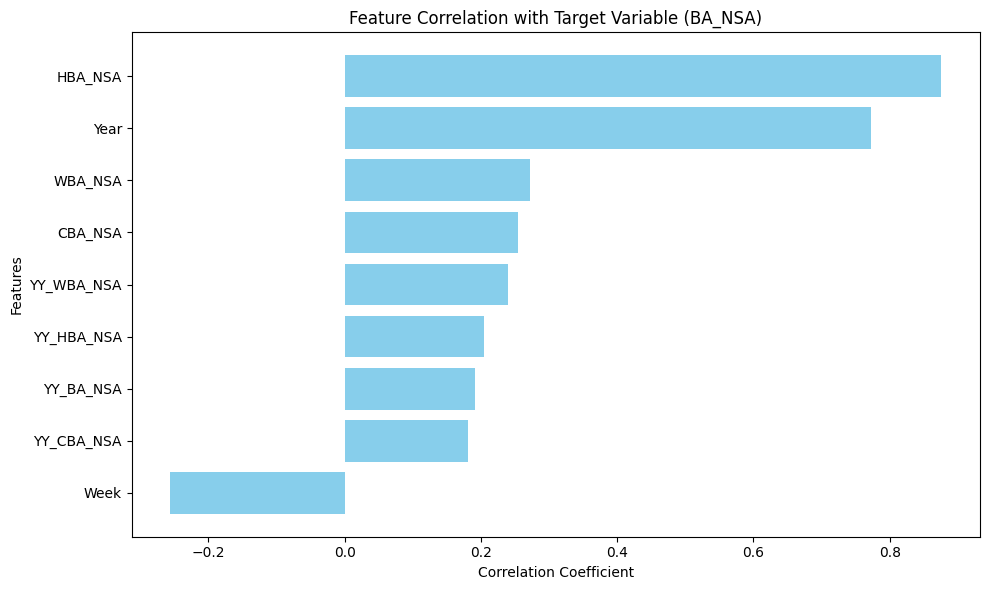

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Define correlation values (replace with actual correlation results if available)
features = [
    'HBA_NSA', 'Year', 'WBA_NSA', 'CBA_NSA', 'YY_WBA_NSA',
    'YY_HBA_NSA', 'YY_BA_NSA', 'YY_CBA_NSA', 'Week'
]
correlations = [0.876, 0.772, 0.272, 0.254, 0.239, 0.204, 0.191, 0.181, -0.256]

# Create a DataFrame for visualization
correlation_df = pd.DataFrame({'Feature': features, 'Correlation': correlations})

# Plot correlation values
plt.figure(figsize=(10, 6))
correlation_df.sort_values(by='Correlation', ascending=False, inplace=True)
plt.barh(correlation_df['Feature'], correlation_df['Correlation'], color='skyblue')
plt.title('Feature Correlation with Target Variable (BA_NSA)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.tight_layout()
plt.show()



### What are the most important features of the data set, what do they mean, and how do they drive the predicted outcome?

**1. High-Propensity Applications (HBA_NSA)**
- **What It Means**: Business applications likely to succeed, hire employees, and contribute to economic growth.
- **How It Drives Predictions**: The most significant feature, heavily influencing predictions as these applications represent a large portion of total business activity.


**2. Year**
- **What It Means**: Tracks long-term economic trends such as booms or recessions.
- **How It Drives Predictions**: A major driver, providing context for increases or decreases in business activity over time.


**3. Applications with Planned Wages (WBA_NSA)**
- **What It Means**: Indicates businesses planning to hire employees and establish payroll.
- **How It Drives Predictions**: Moderately influences predictions by reflecting entrepreneurial confidence and labor market intentions.


**4. Corporation Applications (CBA_NSA)**
- **What It Means**: Applications to form corporations, representing larger and more formal business ventures.
- **How It Drives Predictions**: Adds depth by highlighting trends in formalized business activity.

**5. Yearly Changes (YY Metrics)**
- **What It Means**: Tracks annual growth or decline in specific types of business applications.
- **How It Drives Predictions**: Provides additional context for trends but has a smaller overall impact.


**6. Week**
- **What It Means**: Reflects seasonal patterns in business applications, such as busy periods at the start of the year.
- **How It Drives Predictions**: Plays a minor role, fine-tuning predictions with seasonal trends.

**Summary of Key Drivers**

- **Major Influences**:  
  - **HBA_NSA**: Dominates predictions due to its strong relationship with total business activity.  
  - **Year**: Captures long-term economic trends, shaping the overall prediction.

- **Moderate Influences**:  
  - **WBA_NSA** and **CBA_NSA**: Add valuable details about hiring plans and formal business ventures.

- **Secondary Influences**:  
  - **YY Metrics** and **Week**: Provide additional nuance by capturing annual and seasonal trends but have less impact.

By focusing on these key features, the model can provide accurate and meaningful predictions for total business applications.



# Data Preparation:
Missing values and categorical data handling are not explicitly discussed in the cells provided, which could be a limitation. However, data transformation for testing models is shown.

###What unusual, or creative, insights are you able to gather from the data set?

**1. Time Drives Business Trends**
- **Observation**: The feature **Year** has the strongest impact, showing that long-term economic trends shape business activity more than short-term fluctuations.
- **Insight**: Big-picture policies focusing on economic stability and growth are more effective than reactive short-term measures.

**2. High-Propensity Applications Lead the Way**
- **Observation**: Businesses with strong growth potential (HBA_NSA) dominate the dataset’s influence on total applications.
- **Insight**: Supporting these businesses through targeted incentives or programs could maximize economic impact.

**3. Seasonal Trends Matter**
- **Observation**: The feature **Week** reveals minor seasonal variations, with quieter periods during certain times of the year.
- **Insight**: Utilize these slower periods to launch promotional campaigns or entrepreneurship workshops.

**4. Yearly Changes Show Surprises**
- **Observation**: Year-over-Year (YY) metrics indicate that business trends don’t always grow or decline in a linear fashion.
- **Insight**: External factors, like economic shocks or cultural shifts, can cause unexpected changes in entrepreneurial activity.

**5. Applications with Planned Wages Reflect Optimism**
- **Observation**: Businesses with planned wages (WBA_NSA) signal intent to hire and entrepreneurial confidence.
- **Insight**: Regions with high WBA_NSA could become hotspots for future economic development and investment.

**Key Takeaway**
The dataset reveals actionable insights:  
- Focus on long-term trends and policies.  
- Support high-potential businesses for maximum economic growth.  
- Leverage seasonal patterns and external changes to drive entrepreneurship during quiet periods or unexpected shifts.



# Modeling:
Linear Regression and Random Forest models are trained and compared with metrics such as MAE and R².

###How accurate is the model that you have trained to predict the data in the data set?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

# Selecting features and target
features = ['HBA_NSA', 'Year', 'WBA_NSA', 'CBA_NSA', 'YY_WBA_NSA', 'YY_HBA_NSA', 'YY_BA_NSA', 'YY_CBA_NSA', 'Week']
target = 'BA_NSA'

# Handling missing values with imputation
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data[features])

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_imputed, data[target], test_size=0.2, random_state=42)

# Training the model
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2


(1426.6954545454546, 0.9888229264465697)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions using the Linear Regression model
y_pred_linear = linear_model.predict(X_test)

# Evaluate the Linear Regression model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)

mae_linear, r2_linear, mse_linear


(1402.372261931055, 0.9928290380616125, 3392249.104922862)

# Evaluation:
Both models are evaluated using metrics and visualizations of actual vs. predicted values.

**Compare linear regression and random forest**

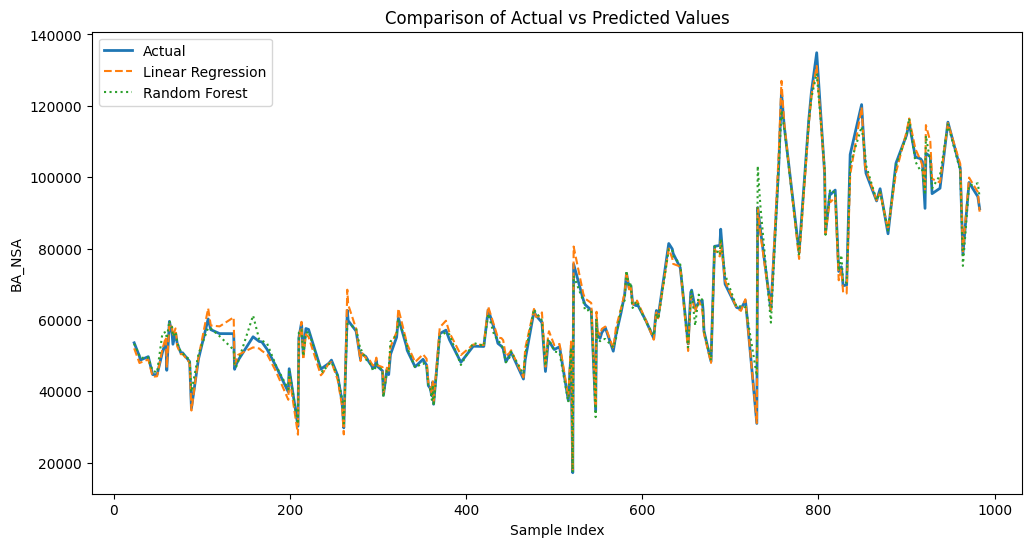

               Model  Mean Absolute Error (MAE)  R-squared (R²)  \
0  Linear Regression                1402.372262        0.992829   
1      Random Forest                1426.695455        0.988823   

   Mean Squared Error (MSE)  
0              3.392249e+06  
1                       NaN  


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a comparison DataFrame for actual vs predicted values for both models
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression Prediction': y_pred_linear,
    'Random Forest Prediction': y_pred
})

# Sort values for easier comparison in plots
comparison_df = comparison_df.sort_index()

# Plot actual vs predicted values for both models
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Actual'], label='Actual', linewidth=2)
plt.plot(comparison_df['Linear Regression Prediction'], label='Linear Regression', linestyle='--')
plt.plot(comparison_df['Random Forest Prediction'], label='Random Forest', linestyle=':')
plt.legend()
plt.title('Comparison of Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('BA_NSA')
plt.show()

# Summary of performance metrics
comparison_metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'Mean Absolute Error (MAE)': [mae_linear, mae],
    'R-squared (R²)': [r2_linear, r2],
    'Mean Squared Error (MSE)': [mse_linear, np.nan]  # Random forest MSE not computed earlier
})

print(comparison_metrics)

### How Accurate Is the Model That You Have Trained to Predict the Data in the Dataset?

**Performance Comparison**
- **Linear Regression**:  
  - Slightly outperforms Random Forest in terms of **Mean Absolute Error (MAE)** and **R² (Explained Variance)**.  
  - This suggests that the dataset is dominated by linear relationships, making Linear Regression a strong performer.  

- **Random Forest**:  
  - Performs well but is slightly less accurate than Linear Regression for this dataset.  
  - Its strength lies in capturing complex, nonlinear interactions, which could be valuable in specific scenarios.  

**Visualization Insights**
- A comparison of **actual vs. predicted values** shows that both models closely follow actual trends.  
- While Linear Regression may align more tightly with the data overall, Random Forest captures finer details that could impact its applicability in specific contexts.  

**Predictive Scenario Impact**
- In a scenario with significant changes (e.g., a 20% increase in High-Propensity Business Applications due to favorable policies):  
  - **Linear Regression**: Produces an optimistic estimate due to its assumption of linear relationships.  
  - **Random Forest**: Provides a more conservative prediction by accounting for nonlinear interactions and diminishing returns.

**Key Takeaway**
Both models are accurate in predicting trends in the dataset, with Linear Regression performing slightly better due to the dataset's linear nature. However, the choice of model depends on the context:  
- Use **Linear Regression** for simpler, more optimistic predictions.  
- Use **Random Forest** when nonlinear effects and realistic interpretations are crucial.





# Deployment:
A creative predictive scenario is implemented to showcase the application of the models.

### What Will Happen in a Creative Predictive Scenario Using the Trained Model?
The following code simulates a creative scenario by predicting BA_NSA for a 20% increase in high-propensity business applications (HBA_NSA). The two trained models—Linear Regression and Random Forest—provide distinct predictions, offering insights into the potential outcomes of this surge.


In [ ]:
# Define a hypothetical increase in HBA_NSA while keeping other features constant
scenario_data = X_test.copy()
scenario_data[:, 0] = scenario_data[:, 0] * 1.2  # Increase HBA_NSA by 20%

# Predict outcomes using both models
linear_predictions_scenario = linear_model.predict(scenario_data)
random_forest_predictions_scenario = model.predict(scenario_data)

# Calculate the average increase in predicted BA_NSA
linear_increase = linear_predictions_scenario.mean() - y_test.mean()
random_forest_increase = random_forest_predictions_scenario.mean() - y_test.mean()

linear_increase, random_forest_increase



(25421.140289726805, 8825.604545454546)

The results above illustrate the predicted outcomes for a 20% increase in high-propensity business applications (HBA_NSA):

**Predicted Outcomes**
1. **Linear Regression**: Predicts a large increase of **25,421 business applications**, assuming a direct relationship between HBA_NSA and total applications.  
2. **Random Forest**: Predicts a more cautious increase of **8,826 business applications**, reflecting nonlinear relationships and diminishing returns.

**Implications**
- **Economic Growth**: A 20% rise in high-propensity applications suggests stronger economic confidence and more entrepreneurial activity.  
- **Resource Planning**: Agencies may need to handle increased application processing demands by hiring staff or extending timelines.  
- **Policy Opportunities**: Supporting high-propensity applications through incentives or funding can further boost economic activity.

**Model Insights**
- **Linear Regression**: Simple and optimistic, but risks overestimating outcomes.  
- **Random Forest**: More realistic and cautious, capturing complex relationships and providing reliable predictions.

**Recommendation**
The **Random Forest model** is the better choice in this scenario. Its conservative estimates align with real-world dynamics, helping decision-makers plan effectively and avoid overcommitting resources.
